In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline

In [3]:
ds = xr.open_dataset('data/nwm-v1.2-channel_spatial_index.nc')
df = ds.to_dataframe()
ds

<xarray.Dataset>
Dimensions:     (feature_id: 2729077)
Coordinates:
  * feature_id  (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    latitude    (feature_id) float32 31.086876 46.022163 ... 32.155148 32.158184
    longitude   (feature_id) float32 -94.64054 -67.98641 ... -115.93743
Attributes:
    proj4:                +proj=longlat +datum=NAD83 +no_defs
    esri_pe_string:       GEOGCS[GCS_North_American_1983,DATUM[D_North_Americ...
    model_version:        NWM 1.2
    Conventions:          CF-1.6
    cdm_datatype:         Station
    station_dimension:    feature_id
    stream_order_output:  1

In [8]:
!gsutil ls gs://fcast/datastore

gs://fcast/datastore/Data/
gs://fcast/datastore/NWM/
gs://fcast/datastore/States/


In [10]:
!gsutil du gs://fcast/datastore/NWM/nwm-v1.2-channel_spatial_index.csv

81241183     gs://fcast/datastore/NWM/nwm-v1.2-channel_spatial_index.csv


In [7]:
test_df = pd.read_csv('gs://fcast/datastore/NWM/nwm-v1.2-channel_spatial_index.csv', index_col='feature_id')
test_df.head()

_call non-retriable exception: Anonymous caller does not have storage.objects.list access to fcast.
Traceback (most recent call last):
  File "c:\users\abrazeau\appdata\local\continuum\miniconda3\lib\site-packages\gcsfs\core.py", line 464, in _call
    validate_response(r, path)
  File "c:\users\abrazeau\appdata\local\continuum\miniconda3\lib\site-packages\gcsfs\core.py", line 167, in validate_response
    raise HttpError(error)
gcsfs.utils.HttpError: Anonymous caller does not have storage.objects.list access to fcast.


HttpError: Anonymous caller does not have storage.objects.list access to fcast.

In [4]:
df.head()

,latitude,longitude
feature_id,,
101,31.086876,-94.640541
179,46.022163,-67.986412
181,46.016491,-67.998726
183,46.020847,-67.998833
185,46.019714,-67.998619


In [22]:
gdf = gpd.GeoDataFrame(df, geometry=[Point(c) for c in list(zip(df.longitude, df.latitude))])
gdf.crs = ds.proj4

In [23]:
gdf.head()

,latitude,longitude,geometry
feature_id,,,
101,31.086876,-94.640541,POINT (-94.64054 31.08688)
179,46.022163,-67.986412,POINT (-67.98641 46.02216)
181,46.016491,-67.998726,POINT (-67.99873 46.01649)
183,46.020847,-67.998833,POINT (-67.99883 46.02085)
185,46.019714,-67.998619,POINT (-67.99862 46.01971)


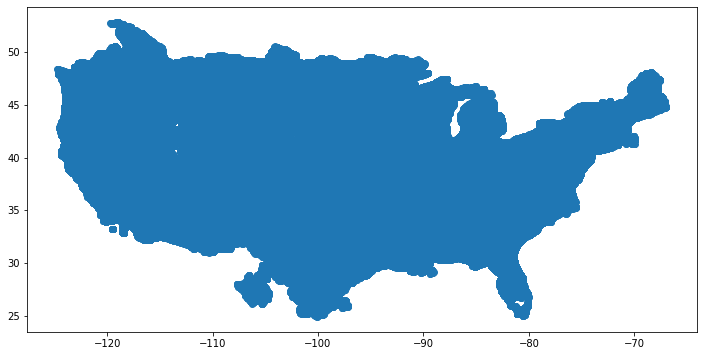

In [24]:
gdf.plot(figsize=(12,12))